Text(0.5, 1.0, 'ECG filtré [Réponse en fréquence]')

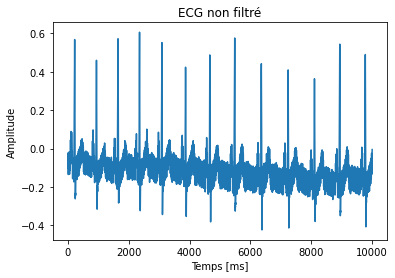

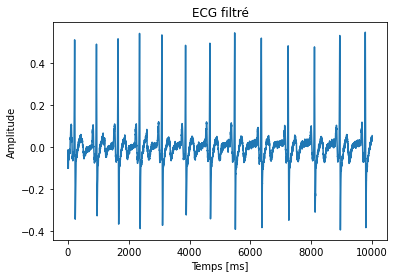

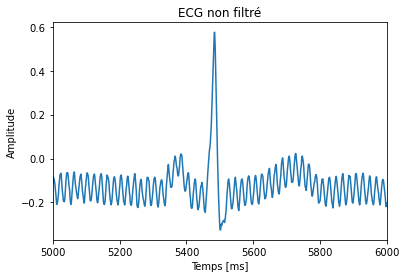

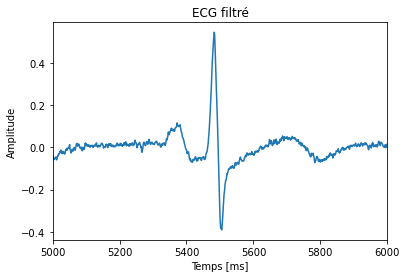

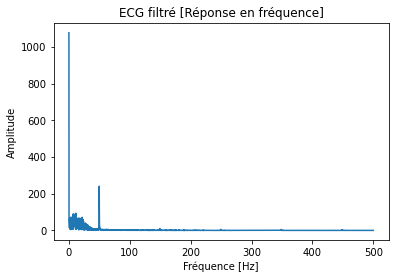

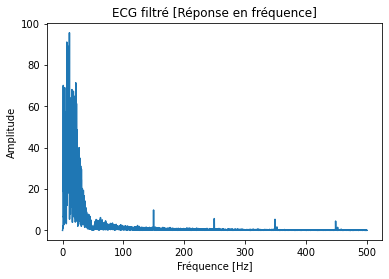

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IIR2Filter import IIR2Filter

#----------Importation des données avant filtrage-----------
data = np.loadtxt('resting.dat')
ampGain = 500;
fs = 1000;

ecg = data[:,1]
x = data[:,0]

# Supprimmer le gain 
ecg = ecg/ampGain #amplitude ecg en mV
rangeEcg = max(ecg)-min(ecg)
ecg = ecg-(min(ecg)+rangeEcg/2)

ecg = ecg[0:10000]
x = x[0:10000]

#---------------------------------Filtrage-----------------------------

# Fréquence en Hz, et doit être normalisée (fs)
FilterMains = IIR2Filter(3,[45,55],'bandstop',design='cheby1',rp=0.01,fs=fs)
# Création d'un filtre de Butterworth passe-haut de d'ordre 10 avec des fréquences normalisées 
# fréquence 0.002 (=1 Hz avec fs=1000 Hz (fréquence d'échantillonnage)).
FilterDC = IIR2Filter(4,0.002,'highpass')

ecgFiltered = np.zeros(len(ecg))

for i in range(len(ecg)):
    ecgFiltered[i] = FilterMains.filter(ecg[i])
    ecgFiltered[i] = FilterDC.filter(ecgFiltered[i])
        
#-------------------------------Courbes---------------------------------    

plt.figure(1)
plt.plot(x,ecg)
plt.xlabel("Temps [ms]")
plt.ylabel("Amplitude")
plt.title("ECG non filtré")

plt.figure(2)
plt.plot(x,ecgFiltered)
plt.xlabel("Temps [ms]")
plt.ylabel("Amplitude")
plt.title("ECG filtré")

plt.figure(3)
plt.plot(x[5000:6000],ecg[5000:6000])
plt.xlim([5000,6000])
plt.xlabel("Temps [ms]")
plt.ylabel("Amplitude")
plt.title("ECG non filtré")

plt.figure(4)
plt.plot(x[5000:6000],ecgFiltered[5000:6000])
plt.xlim([5000,6000])
plt.xlabel("Temps [ms]")
plt.ylabel("Amplitude")
plt.title("ECG filtré")

freq = np.fft.fft(ecg)
freq = abs(freq[0:int(len(freq)/2)])
xfF = np.linspace(0,fs/2,len(freq))
plt.figure(5)
plt.plot(xfF,np.real(freq))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.title("ECG filtré [Réponse en fréquence]")

freq = np.fft.fft(ecgFiltered)
freq = abs(freq[0:int(len(freq)/2)])
xfF = np.linspace(0,fs/2,len(freq))
plt.figure(6)
plt.plot(xfF,np.real(freq))
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.title("ECG filtré [Réponse en fréquence]")


